## Vivian Do
## January 29th, 2024
# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [10]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [122]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"} # remove all punctuations in set except for hashtags

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    num_tokens=len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        counter = Counter(tokens)
        top_5_tokens = counter.most_common(5)
        print("Top 5 most common tokens:")
        for token, count in top_5_tokens:
            print(f"{token}: {count} occurrences")
            
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    
    return(0)

def contains_emoji(s):
    """ 
        Function takes a single argument (s) that is expected to be a string object. The first line
        of code converts the input into a string object if it is not already. The second line of code
        checks to see if the string object contains an emoji. If at least one emoji is found, the 
        function returns 'True', otherwise 'False'
    """
    s = str(s) 
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    return [token for token in tokens if token not in sw]
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    """
        Function takes two arguments: (1) text, which is the input string, and (2) the punctuation set, which is set to the tw_punct value set.
        Returns all characters not found in the punctuation set and concatenates them back into a string using the .join() method with an empty
        string "" as the separator. 
    """
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ 
        Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. 
    """
    tokens = text.split()
    return(tokens)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [13]:
# read in twitter data
cher_path="/Users/viviando/Desktop/MSADS/ADS509_TextMining/assigments/twitter/cher_followers_data.txt"
robyn_path="/Users/viviando/Desktop/MSADS/ADS509_TextMining/assigments/twitter/robynkonichiwa_followers_data.txt"

cher= pd.read_csv(cher_path, delimiter='\t', error_bad_lines=False) # skip lines w/ extra fields causing errors
robyn= pd.read_csv(robyn_path, delimiter='\t', error_bad_lines=False)

/var/folders/b8/4ntn3_wd1wg59r0lmbfgfmwc0000gn/T/ipykernel_88870/3107404786.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  cher= pd.read_csv(cher_path, delimiter='\t', error_bad_lines=False) # skip lines w/ extra fields causing errors
b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 12\n'
b'Skipping line 677792: expected 7 fields, saw 12\nSkipping line 773482: expected 7 fields, saw 12\n'
b'Skipping line 818258: expected 7 fields, saw 12\nSkipping line 895225: expected 7 fields, saw 12\n'
b'Skipping line 955213: expected 7 fields, saw 10\nSkipping line 994827: expected 7 fields, saw 12\n'
b'Sk

In [22]:
cher_tweets= pd.DataFrame(cher['description'], columns=['description'])
robyn_tweets = pd.DataFrame(robyn['description'], columns=['description'])

In [92]:
# read in the lyrics here

# select directory with lyric file path
frank_ocean_path = ('/Users/viviando/Desktop/MSADS/ADS509_TextMining/assigments/lyrics/frank_ocean')

# change to current working directory
os.chdir(frank_ocean_path)

# get list of csv files 
frank_songs = os.listdir(frank_ocean_path)

# show all csv files
#print(frank_songs)

df = []
for txt_file in frank_songs:
    file_path=os.path.join(frank_ocean_path, txt_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        df.append((txt_file, content))

# create a DataFrame from the list
frank_ocean_lyrics = pd.DataFrame(df, columns=['Title', 'Lyrics'])

# cleanup
# frank_ocean_lyrics['Lyrics']=frank_ocean_lyrics['Lyrics'].str.replace('\n', " ") removed later, used to differentiate title from lyrics in file
frank_ocean_lyrics['Title']=frank_ocean_lyrics['Title'].str.replace('frankocean_', "")
frank_ocean_lyrics['Title']=frank_ocean_lyrics['Title'].str.replace('.txt', "")

# print
print(frank_ocean_lyrics)

                          Title  \
0                   naturefeels   
1             cantbethelasttime   
2                 songsforwomen   
3                      swimgood   
4   bitchestalkinmetalgearsolid   
5               americanwedding   
6                          dust   
7                       blasted   
8               strawberryswing   
9                          done   
10                      dayaway   
11                     wealltry   
12                 bedtimestory   
13                acuraintegurl   
14                     novacane   
15                 brokenpieces   
16             therewillbetears   
17                        denim   
18                   lovecrimes   
19               bricksandsteel   

                                               Lyrics  
0   Nature Feels\n\n\n\n\nYeah\n\nOh-oh, yeah\n\n\...  
1   Can't Be The Last Time\n\n\n\n\nOh, wait a min...  
2   Songs For Women\n\n\n\n\nHa ha\n\nWhen I was y...  
3   Swim Good\n\n\n\n\nThat's a pretty b

/var/folders/b8/4ntn3_wd1wg59r0lmbfgfmwc0000gn/T/ipykernel_88870/894103386.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  frank_ocean_lyrics['Title']=frank_ocean_lyrics['Title'].str.replace('.txt', "")


In [91]:
# sza
sza_path = ('/Users/viviando/Desktop/MSADS/ADS509_TextMining/assigments/lyrics/sza')
os.chdir(sza_path)
sza_songs = os.listdir(sza_path)
df = []
for txt_file in sza_songs:
    file_path=os.path.join(sza_path, txt_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        df.append((txt_file, content))

sza_lyrics = pd.DataFrame(df, columns=['Title', 'Lyrics'])

# cleanup
#sza_lyrics['Lyrics']=sza_lyrics['Lyrics'].str.replace('\n', " ")
sza_lyrics['Title']=sza_lyrics['Title'].str.replace('sza_', "")
sza_lyrics['Title']=sza_lyrics['Title'].str.replace('.txt', "")

# print df
print(sza_lyrics)

               Title                                             Lyrics
0              advil  Advil\n\n\n\n\nHigh, hi-high\n\nHigh, hi-high,...
1            country  Country\n\n\n\n\nThis here is the epic tale of...
2            castles  Castles\n\n\n\n\nWish I was prettier a little ...
3              julia  Julia\n\n\n\n\nHere soon, here soon\n\nHere so...
4          warmwinds                                     Warm Winds\n\n
5             kismet  Kismet\n\n\n\n\nKeep your intentions pure don'...
6         childsplay                                    Childs Play\n\n
7        crackdreams  Crack Dreams\n\n\n\n\nTostitos are the shit\n\...
8              wings  Wings\n\n\n\n\nWouldn't you like to believe\n\...
9      onceuponahigh  Once Upon A High\n\n\n\n\nAhem\n\nHigh up on (...
10  timetravelundone  Time Travel Undone\n\n\n\n\nI'm tired of time ...
11               bed  Bed\n\n\n\n\nInto the roads, it's open\n\nBare...
12                ur  U R\n\n\n\n\n\n[Reversed:]\n\nClarity is a

/var/folders/b8/4ntn3_wd1wg59r0lmbfgfmwc0000gn/T/ipykernel_88870/1745213839.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  sza_lyrics['Title']=sza_lyrics['Title'].str.replace('.txt', "")


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

In [93]:
# remove song titles
# each file begins with the song title, delimited by 4 lines '\n\n\n\n'. use this to isolate and remove song titles from lyrics
title_pattern = re.compile(r'.*?\n\n\n\n')
frank_ocean_lyrics['Lyrics'] = frank_ocean_lyrics['Lyrics'].apply(lambda x: title_pattern.sub('',x))

# general clean up to remove spaces \n\
frank_ocean_lyrics['Lyrics']=frank_ocean_lyrics['Lyrics'].str.replace('\n', " ") 

# casefold to lowercase
frank_ocean_lyrics['Lyrics'] = frank_ocean_lyrics['Lyrics'].str.lower()

# remove punctuation 
frank_ocean_lyrics['Lyrics'] = frank_ocean_lyrics['Lyrics'].apply(remove_punctuation)

# split on whitespace
frank_ocean_lyrics['Tokens'] = frank_ocean_lyrics['Lyrics'].apply(tokenize)

frank_ocean_lyrics

,Title,Lyrics,Tokens
0,naturefeels,yeah ive been meaning to fuck you in the gar...,"[yeah, ive, been, meaning, to, fuck, you, in, ..."
1,cantbethelasttime,oh wait a minute baby girl can we just sit do...,"[oh, wait, a, minute, baby, girl, can, we, jus..."
2,songsforwomen,ha ha if i was singing songs just to sing th...,"[ha, ha, if, i, was, singing, songs, just, to,..."
3,swimgood,thats a pretty big trunk on my lincoln town c...,"[thats, a, pretty, big, trunk, on, my, lincoln..."
4,bitchestalkinmetalgearsolid,stop stop stop let me do it fine no you alw...,"[stop, stop, stop, let, me, do, it, fine, no, ..."
5,americanwedding,american love american me american you ame...,"[american, love, american, me, american, you, ..."
6,dust,whos that talking in the library whos that t...,"[whos, that, talking, in, the, library, whos, ..."
7,blasted,shes the prettiest girl ive ever seen on a sk...,"[shes, the, prettiest, girl, ive, ever, seen, ..."
8,strawberryswing,when we were kids we handpainted strawberrie...,"[when, we, were, kids, we, handpainted, strawb..."
9,done,sitting next to your coffee table im trying ...,"[sitting, next, to, your, coffee, table, im, t..."


In [108]:
# remove song titles
# each file begins with the song title, delimited by 4 lines '\n\n\n\n'. use this to isolate and remove song titles from lyrics
title_pattern = re.compile(r'.*?\n\n\n\n')
sza_lyrics['Lyrics'] = sza_lyrics['Lyrics'].apply(lambda x: title_pattern.sub('',x))

# general clean up to remove spaces \n\
sza_lyrics['Lyrics']=sza_lyrics['Lyrics'].str.replace('\n', " ") 

# casefold to lowercase
sza_lyrics['Lyrics'] = sza_lyrics['Lyrics'].str.lower()

# remove punctuation 
sza_lyrics['Lyrics'] = sza_lyrics['Lyrics'].apply(remove_punctuation)

# split on whitespace
sza_lyrics['Tokens'] = sza_lyrics['Lyrics'].apply(tokenize)

sza_lyrics

,Title,Lyrics,Tokens
0,advil,high hihigh high hihigh oh high hihigh hig...,"[high, hihigh, high, hihigh, oh, high, hihigh,..."
1,country,this here is the epic tale of a broken mind ...,"[this, here, is, the, epic, tale, of, a, broke..."
2,castles,wish i was prettier a little for you maybe i...,"[wish, i, was, prettier, a, little, for, you, ..."
3,julia,here soon here soon loving alone is what you...,"[here, soon, here, soon, loving, alone, is, wh..."
4,warmwinds,warm winds,"[warm, winds]"
5,kismet,keep your intentions pure dont be scared dont...,"[keep, your, intentions, pure, dont, be, scare..."
6,childsplay,childs play,"[childs, play]"
7,crackdreams,id rather die than be your slave slit my wri...,"[id, rather, die, than, be, your, slave, slit,..."
8,wings,wouldnt you like to believe im on the edge ...,"[wouldnt, you, like, to, believe, im, on, the,..."
9,onceuponahigh,ahem high up on high high up on—high up on—...,"[ahem, high, up, on, high, high, up, on—high, ..."


**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [25]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

cher_tweets["tokens"] = cher_tweets["description"].apply(prepare,pipeline=my_pipeline)
cher_tweets["num_tokens"] = cher_tweets["tokens"].map(len) 

robyn_tweets["tokens"] = robyn_tweets["description"].apply(prepare,pipeline=my_pipeline)
robyn_tweets["num_tokens"] = robyn_tweets["tokens"].map(len) 


In [26]:
cher_tweets['has_emoji'] = cher_tweets["description"].apply(contains_emoji)
robyn_tweets['has_emoji'] = robyn_tweets["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [27]:
cher_tweets['has_emoji'].value_counts()


False    3545567
True      370735
Name: has_emoji, dtype: int64

For Cher, there are 370,735 tweets that use at least one emoji. 

In [28]:
robyn_tweets['has_emoji'].value_counts()

False    325376
True      26463
Name: has_emoji, dtype: int64

For Robyn, there are 26,463 tweets that use at least one emoji. 

In [41]:
print('Cher tweets using at least 1 emoji')
cher_tweets.loc[cher_tweets['has_emoji']].sample(10)[["description","tokens"]]

Cher tweets using at least 1 emoji


,description,tokens
1644211,Retro Designer 🪄✂️🧵 📍🪡 Fan Sci Fi - Horror - T...,"[retro, designer, 🪄✂️🧵, 📍🪡, fan, sci, fi, horr..."
1224630,lovin this life !! 👑 Mother Daughter,"[lovin, life, 👑, mother, daughter]"
3706533,👄Romance Writer 🦁Proud Detroiter 💗 Lover of Pr...,"[👄romance, writer, 🦁proud, detroiter, 💗, lover..."
2643557,~DM a picture you want me to beautify and I'll...,"[dm, picture, want, beautify, ill, follow, fol..."
791327,living the dream. making memories. published c...,"[living, dream, making, memories, published, c..."
461912,"✌ imaginativo, creativo, interesante, misterio...","[✌, imaginativo, creativo, interesante, mister..."
203508,"Calgary, Ab, Canada. ©maaos2021.","[calgary, ab, canada, ©maaos2021]"
341228,"Sustainability is life, and work 🌿 #circularec...","[sustainability, life, work, 🌿, #circularecon,..."
1471312,"Founder Kimo Bear Project, benefiting Pediatri...","[founder, kimo, bear, project, benefiting, ped..."
1969635,"23 | he/they | cancer sun, aries moon, libra r...","[23, hethey, cancer, sun, aries, moon, libra, ..."


In [42]:
print('Robyn tweets using at least 1 emoji')
robyn_tweets[robyn_tweets.has_emoji].sample(10)[["description","tokens"]]


Robyn tweets using at least 1 emoji


,description,tokens
56526,Beautiful ChubbyQueen Kind Hardworking✊❤ Chris...,"[beautiful, chubbyqueen, kind, hardworking✊❤, ..."
229461,Love YourSelf Girl Or Nobody Will ☺,"[love, girl, nobody, ☺]"
46693,😋,[😋]
256016,🙄,[🙄]
48434,28. Jesus Saves. 🇯🇲🏴󠁧󠁢󠁥󠁮󠁧󠁿 ⚽️🤘👩🏽‍⚕️🇮🇱 .,"[28, jesus, saves, 🇯🇲🏴󠁧󠁢󠁥󠁮󠁧󠁿, ⚽️🤘👩🏽‍⚕️🇮🇱]"
223168,•ᴀʟᴇxᴀɴᴅʀɪᴀ 🇪🇬 •ᴏᴍᴀɴ 🇴🇲📍•ᴅᴀᴅ❤️ •ǫᴜᴇᴇɴ ᴏғ sᴇᴘ👑♍...,"[•ᴀʟᴇxᴀɴᴅʀɪᴀ, 🇪🇬, •ᴏᴍᴀɴ, 🇴🇲📍•ᴅᴀᴅ❤️, •ǫᴜᴇᴇɴ, ᴏғ..."
114300,Josie. 24. 🥽🧑🏻‍🔬🧪🔬🧫 nonbinary lesbian. one day...,"[josie, 24, 🥽🧑🏻‍🔬🧪🔬🧫, nonbinary, lesbian, one,..."
197636,☔️She/Her🏳️‍🌈 NightRaindrop3,"[☔️sheher🏳️‍🌈, nightraindrop3]"
351245,Global Head of Electronic Music at WME 🌎 Found...,"[global, head, electronic, music, wme, 🌎, foun..."
252880,Hago fotografía y diseño. Paso mi tiempo libre...,"[hago, fotografía, diseño, paso, mi, tiempo, l..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: We could separate emojis from leading/trailing characters. The code currently identifies each string of text (including emojis) as 1 token, so the number of unique tokens is greatly inflated and analysis of lexical diversity is highly inaccurate. 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [123]:
# sza
# combine all tokens into 1 list
sza_combined_tokens = [token for sublist in sza_lyrics['Tokens'] for token in sublist]
descriptive_stats(sza_combined_tokens)


There are 3768 tokens in the data.
There are 752 unique tokens in the data.
There are 14226 characters in the data.
The lexical diversity is 0.200 in the data.
Top 5 most common tokens:
i: 224 occurrences
you: 151 occurrences
the: 90 occurrences
for: 85 occurrences
me: 83 occurrences


[3768, 752, 0.19957537154989385, 14226]

In [124]:
frank_ocean_combined_tokens = [token for sublist in frank_ocean_lyrics['Tokens'] for token in sublist]
descriptive_stats(frank_ocean_combined_tokens)

There are 5908 tokens in the data.
There are 976 unique tokens in the data.
There are 22371 characters in the data.
The lexical diversity is 0.165 in the data.
Top 5 most common tokens:
i: 222 occurrences
you: 176 occurrences
the: 160 occurrences
a: 139 occurrences
and: 117 occurrences


[5908, 976, 0.16519972918077183, 22371]

Q: what observations do you make about these data? 

A: Since stopwords were not removed, both artists had similar occuring words. For example, 'i' and 'you', and 'the' appeared in the top 3 most commonly used word for both artists. 


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [168]:
# combine all tokens for each corpora into 1 list
cher_combined_tokens = [token for sublist in cher_tweets['tokens'] for token in sublist]
robyn_combined_tokens = [token for sublist in robyn_tweets['tokens'] for token in sublist]
frank_ocean_combined_tokens = [token for sublist in frank_ocean_lyrics['Tokens'] for token in sublist]
sza_combined_tokens = [token for sublist in sza_lyrics['Tokens'] for token in sublist]

In [211]:
# remove 'nan' values in tweets
cleaned_cher_combined_tokens = [value for value in cher_combined_tokens if value != 'nan']
cleaned_robyn_combined_tokens = [value for value in robyn_combined_tokens if value != 'nan']

# get total counts
print(len(cleaned_cher_combined_tokens))
print(len(cleaned_robyn_combined_tokens))
print(len(frank_ocean_combined_tokens))
print(len(sza_combined_tokens))


16152269
1538411
5908
3768


In [225]:
# get value counts
cher_counts= pd.Series(cleaned_cher_combined_tokens).value_counts()
robyn_counts = pd.Series(cleaned_robyn_combined_tokens).value_counts()
frank_counts = pd.Series(frank_ocean_combined_tokens).value_counts()
sza_counts = pd.Series(sza_combined_tokens).value_counts()

In [226]:
# get concentrations
cher_conc = cher_counts/cher_len
robyn_conc = robyn_counts/robyn_len
frank_conc = frank_counts/frank_len
sza_conc = sza_counts/sza_len


In [209]:
# filter for tokens that appear in all 4 corpora at least 5 times 
# combine all lists into 1 
all_tokens = [cleaned_cher_combined_tokens, cleaned_robyn_combined_tokens, frank_ocean_combined_tokens, sza_combined_tokens]

# count occurrences of each value in each list
counters = [Counter(lst) for lst in all_tokens]

# find values that appear at least 5 times in all lists
common_values = set.intersection(*[set(val for val, count in counter.items() if count >= 5) for counter in counters])

# create a list store calculations
concentrations_list = []

# for each token, calculate the count, concentration, and ratio for each corpora
for value in common_values:
    concentrations = [counter[value] / len(lst) if counter[value] >= 5 else None for lst, counter in zip(all_tokens, counters)]
    counts = [counter[value] if counter[value] >= 5 else None for counter in counters]
    ratios = [concentrations[i] / ((sum(counts) - counts[i]) / (sum(map(len, all_tokens)) - len(all_tokens[i]))) if concentrations[i] is not None else None for i in range(len(all_tokens))]
    concentrations_list.append({
                                'Token': value,
                                'Count_Cher': counts[0],
                                'Count_Robyn': counts[1],
                                'Count_Frank_Ocean': counts[2],
                                'Count_Sza': counts[3],
                                'Concentration_Cher': concentrations[0],
                                'Concentration_Robyn': concentrations[1],
                                'Concentration_Frank_Ocean': concentrations[2],
                                'Concentration_Sza': concentrations[3],
                                'Ratio_Cher': ratios[0],
                                'Ratio_Robyn': ratios[1],
                                'Ratio_Frank_Ocean': ratios[2],
                                'Ratio_Sza': ratios[3]})

# store results in a df
group_compare = pd.DataFrame(concentrations_list)

group_compare.head()


,Token,Count_Cher,Count_Robyn,Count_Frank_Ocean,Count_Sza,Concentration_Cher,Concentration_Robyn,Concentration_Frank_Ocean,Concentration_Sza,Ratio_Cher,Ratio_Robyn,Ratio_Frank_Ocean,Ratio_Sza
0,one,45489,3294,20,39,0.002816,0.002141,0.003385,0.010350,1.300273,0.759758,1.226905,3.753157
1,ooh,112,12,29,8,0.000007,0.000008,0.004909,0.002123,0.219070,0.846089,657.991978,245.571070
2,wont,2620,202,11,5,0.000162,0.000131,0.001862,0.001327,1.151878,0.805058,11.653689,8.288999
3,aint,2264,169,23,5,0.000140,0.000110,0.003893,0.001327,1.101468,0.774628,28.254698,9.561374
4,little,17785,1290,8,5,0.001101,0.000839,0.001354,0.001327,1.308191,0.761447,1.255764,1.230558


In [220]:
# sort by top ratios 
print((group_compare.sort_values(by='Ratio_Cher', ascending=False)).head(10)[['Token', 'Ratio_Cher']])

    Token  Ratio_Cher
16   love    1.741001
9    stay    1.585033
12  right    1.453672
15     im    1.450170
23   want    1.351820
33   pain    1.351082
31    way    1.348320
22   know    1.347781
28     go    1.347400
25   time    1.340090


In [221]:
print((group_compare.sort_values(by='Ratio_Robyn', ascending=False)).head(10)[['Token', 'Ratio_Robyn']])

     Token  Ratio_Robyn
30   youre     1.054867
34    hear     1.042801
21   maybe     1.013946
6      man     0.944482
26    feel     0.905903
11    yeah     0.898531
32    like     0.886493
40  around     0.877183
41     got     0.867494
27    tell     0.851216


In [222]:
print((group_compare.sort_values(by='Ratio_Frank_Ocean', ascending=False)).head(10)[['Token', 'Ratio_Frank_Ocean']])

    Token  Ratio_Frank_Ocean
1     ooh         657.991978
3    aint          28.254698
42  cause          25.934590
11   yeah          25.100553
7      oh          23.878116
24   cant          19.404039
19   baby          17.222336
36  could          14.790113
29  wanna          11.706832
2    wont          11.653689


In [223]:
print((group_compare.sort_values(by='Ratio_Sza', ascending=False)).head(10)[['Token', 'Ratio_Sza']])

    Token   Ratio_Sza
1     ooh  245.571070
11   yeah   45.719991
26   feel   21.761590
21  maybe   19.767997
27   tell   18.121724
10   gone   12.693369
33   pain   12.073385
39   mind   11.155693
34   hear    9.883305
3    aint    9.561374


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Group comparison is able to filter out stopwords without further preprocessing. For song lyrics, the top token was 'ooh' for both artists. This is not surprising compared to the tweet corporas since they are songs. I am not too familiar with Cher or Robyn, so I am not sure how the top tokens relate to each. However, for Frank Ocean and Sza, the top tokens seem to be a good representation of each respective artist. 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [132]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='Tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Sza wordcloud, includes all stopwords


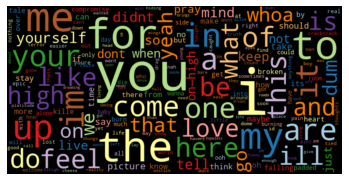

In [158]:
print('Sza wordcloud, includes all stopwords')
sza_freq_df = count_words(sza_lyrics)
wordcloud(sza_freq_df['freq'])

Sza wordcloud, excludes top 30 most frequent words


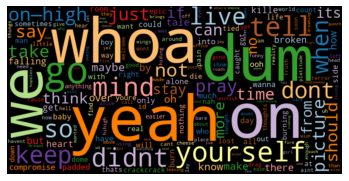

In [159]:
print('Sza wordcloud, excludes top 30 most frequent words')
wordcloud(sza_freq_df['freq'], stopwords=sza_freq_df.head(30).index)

Sza wordcloud, excludes top 50 most frequent words


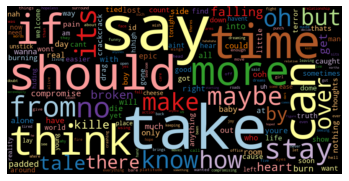

In [160]:
print('Sza wordcloud, excludes top 50 most frequent words')
wordcloud(sza_freq_df['freq'], stopwords=sza_freq_df.head(50).index)

Frank Ocean wordcloud, includes all stopwords


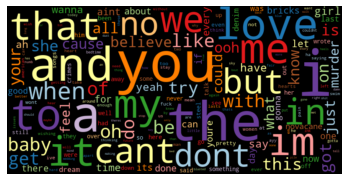

In [161]:
frank_ocean_freq_df = count_words(frank_ocean_lyrics)
print('Frank Ocean wordcloud, includes all stopwords')
wordcloud(frank_ocean_freq_df['freq'])

Frank Ocean wordcloud, excludes top 30 most frequent words


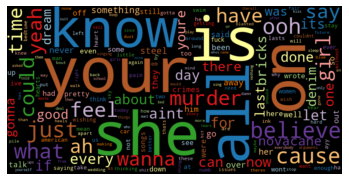

In [228]:
print('Frank Ocean wordcloud, excludes top 30 most frequent words')
wordcloud(frank_ocean_freq_df['freq'], stopwords=frank_ocean_freq_df.head(30).index)

Frank Ocean wordcloud, excludes top 50 most frequent words


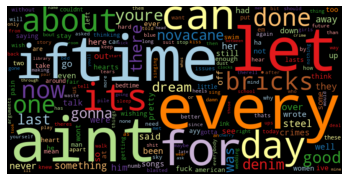

In [227]:
print('Frank Ocean wordcloud, excludes top 50 most frequent words')
wordcloud(frank_ocean_freq_df['freq'], stopwords=frank_ocean_freq_df.head(50).index)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: The wordclouds that include all of the identified frequent words contain many stopwords that are not helpful for analysis. The wordclouds that exclude 30 and 50 of the top most frequent words are sliightly more useful. For example, we see 'Novacane' in the last wordcloud, which is one of Frank Ocean's song in which he repeats the phrase multiple times. Although it is easy to identify which words occur most frequently, it is difficult to quantify the concentration based on the wordclouds alone. 